In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/AUC.csv')
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


tidak ada kolom yang harus dihapus

In [3]:
# Assuming 'stars' column contains strings like "10 stars" or similar
# Extract the first part of the string as a float first to handle decimal numbers
df['stars'] = df['stars'].astype(str).str.split().str[0]
# Replace non-numeric values with NaN
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
# Then convert to integer, if necessary. This will truncate the decimal part
df['stars'] = df['stars'].astype(int,errors='ignore')

df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5.0,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5.0,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5.0,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5.0,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5.0,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5.0,820.00


mengubah format data agar konsisten

In [4]:
fix_cols = ['price']
df[fix_cols] = df[fix_cols].apply(pd.to_numeric, errors='coerce')

# fix_time = ['time']
# df[fix_time] = df[fix_time].apply(pd.to_datetime, errors='coerce')

fix_datetime = ['releasedate']
df[fix_datetime] = df[fix_datetime].apply(pd.to_datetime, errors='coerce')

df.info()

<ipython-input-4-77f8db2eea43>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[fix_datetime] = df[fix_datetime].apply(pd.to_datetime, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87489 non-null  object        
 1   author       87489 non-null  object        
 2   narrator     87489 non-null  object        
 3   time         87489 non-null  object        
 4   releasedate  87489 non-null  datetime64[ns]
 5   language     87489 non-null  object        
 6   stars        15072 non-null  float64       
 7   price        78015 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.3+ MB


fix time

In [5]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,2008-04-08,English,5.0,468.0
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,4.5,820.0
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,2020-06-11,English,4.5,410.0
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,4.5,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,2010-01-13,English,4.5,820.0


missing value

In [6]:
df.isna().sum()

,0
name,0
author,0
narrator,0
time,0
releasedate,0
language,0
stars,72417
price,9474


In [7]:
df['price'].hist(bins = 30, figsize=(12, 6))
plt.show()

In [8]:
df['stars'].skew(), df['price'].skew()

(-2.138406736504683, -0.09878150288940896)

In [9]:
df['stars'].fillna(df['stars'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)

df.isna().sum()

<ipython-input-9-9399a1cb3e3a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stars'].fillna(df['stars'].mean(), inplace=True)
<ipython-input-9-9399a1cb3e3a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
name,0
author,0
narrator,0
time,0
releasedate,0
language,0
stars,0
price,0


In [10]:
df.head()

duplicated checking and handling

In [11]:
df.duplicated().sum()

38

In [12]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [13]:
num_cols = ['price']
stars = ['stars']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
sns.boxplot(data=df[stars])
plt.title('Boxplot of Numerical Columns')
df[num_cols].hist(bins = 30, figsize=(12, 6))
df[stars].hist(bins = 30, figsize=(12, 6))
plt.show()

In [14]:
sns.boxplot(data=df['stars'])
plt.title('Boxplot of Stars')
plt.show()

split data train and test

In [15]:
from sklearn.model_selection import train_test_split

X= df.drop('stars', axis=1)
y= df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69960, 7), (17491, 7), (69960,), (17491,))

feature scaling

In [16]:
# X_train.head()

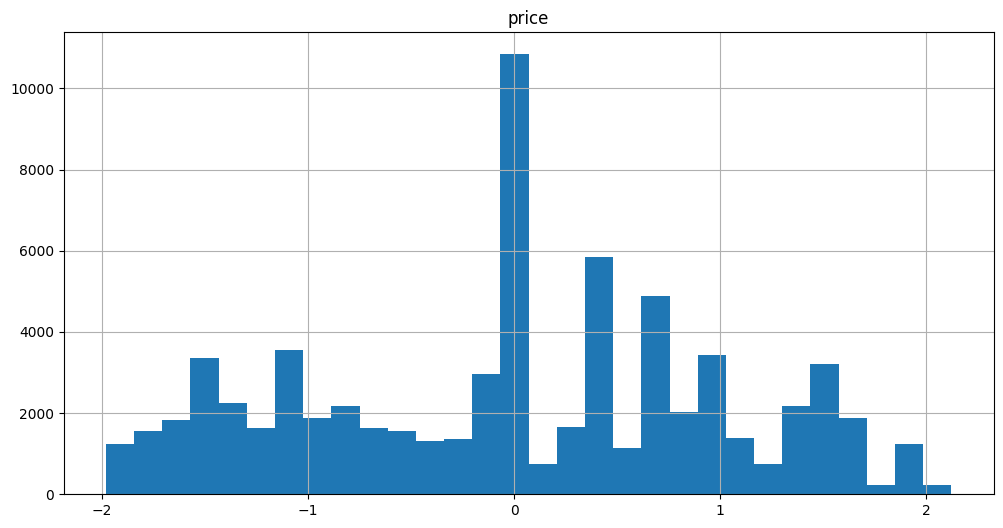

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins = 30, figsize=(12, 6))
plt.show()

In [24]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
name
Sterling Biographies           17
Hamlet                         13
The Science of Getting Rich    13
Sterling Point Books           13
The Art of War                 12
                               ..
The Box-Car Children            1
Running Up That Hill            1
Prayers                         1
Die anderen und wir             1
第708回 新刊ラジオ第2部プレミアム　            1
Name: count, Length: 66728, dtype: int64
--------------------------------------------------
author
Writtenby:矢島雅弘,石橋遊                   670
Writtenby:SmartReading               312
Writtenby:中西貴之,BJ                    243
Writtenby:div.                       216
Writtenby:OnlineStudioProductions    170
                                    ... 
Writtenby:KaarloSarkia                 1
Writtenby:JohnA.Tracy,TageC.Tracy      1
Writtenby:CarmenLaforet                1
Writtenby:TerryHunt,CarlLipo           1
Writtenby:Dr.ThomasC.OdenPhD           1
Name: count, Length:

categorical encoding

In [19]:
# X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
# X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# X_train.head()

# memori RAM nya langsung habis kalo run yang ini

In [20]:
X_train['stars']= y_train
X_test['stars']= y_test

In [21]:
print("Train missing data:",X_train.isna().sum().sum(), "\nTest missing data:",X_test.isna().sum().sum())

print("Train duplicated data:",X_train.duplicated().sum(), "\nTest duplicated data:",X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0
Train duplicated data: 0 
Test duplicated data: 0


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69960 entries, 77132 to 15795
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         69960 non-null  object        
 1   author       69960 non-null  object        
 2   narrator     69960 non-null  object        
 3   time         69960 non-null  object        
 4   releasedate  69960 non-null  datetime64[ns]
 5   language     69960 non-null  object        
 6   price        69960 non-null  float64       
 7   stars        69960 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 4.8+ MB


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17491 entries, 84011 to 71361
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         17491 non-null  object        
 1   author       17491 non-null  object        
 2   narrator     17491 non-null  object        
 3   time         17491 non-null  object        
 4   releasedate  17491 non-null  datetime64[ns]
 5   language     17491 non-null  object        
 6   price        17491 non-null  float64       
 7   stars        17491 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.2+ MB


done